
# Project: Investigate a Dataset - [IMDB Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this data set we are going to discover some underlying properties of the movies that made the highest profits, lowest profits, the actors who appeared the most, the time of the year which movies are released the most and the least and many more questions that will make us understand this dataset quite well.
### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue


### Question(s) for Analysis
 


**Question 1**: Which year has the highest release of movies?

**Question 2**: Which Year Has The Highest Profit Rate?

**Question 3**: Which length movies most liked by the audiences according to their popularity?

**Question 4**: What kinds of properties are associated with movies that have high revenues?

**Question 5**: Most Frequent Actor?

**Question 6**: Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?
 

In [111]:
#Import needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

<a id='wrangling'></a>
## Data Wrangling

Here in this section I explored all the columns and did the following

changed the data types of some features to there correct ones (release_date->Datetime)

explored the null values and the columns with high NA values, dropped the columns with high capacity of null values and dropped the records where null values are low

dropped the duplicates 


In [112]:
# loading, exploring and analysing the data EDA

df=pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv',parse_dates=True,infer_datetime_format=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [113]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [114]:
# changing date into datetime dtype

df['release_date']=pd.to_datetime(df['release_date'])

In [115]:
#checking the nulls
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [116]:
#Names of the columns with null values
nullcols=df.columns[df.isna().sum()>0].tolist()
nullcols


['imdb_id',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'genres',
 'production_companies']

In [117]:
# dropping the duplicates
df.drop_duplicates(inplace=True)


### Data Cleaning

 

In [118]:
#Cleaning the Data, first by dealing with null values
#Dropping 'homepage' ,'tagline','keywords' and 'production_companies' columns as it has more than so many missing rows
# and it can't be imputed, dropping the entire records will
# significantly affect the data, so we only going to drop the columns since it will not provide any useful information

df.drop(['homepage','tagline','keywords','production_companies'],axis=1,inplace=True)

In [119]:
# drop the na records which contains low number of missing values
cols=['imdb_id','cast','director','overview','genres']
df.dropna(subset=cols,inplace=True)

In [120]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


<a id='eda'></a>
## Exploratory Data Analysis

Here I'll start answering the 5 questions I posed with the appropriate visualizations


### Research Question 1 (Which year has the highest release of movies?)

In [141]:
#copy the original df to work on the first research question
X=df.copy()

In [142]:
# First we need to calculate the profit which is (Revenue - Budget) for future questions
X['Profit']=X['revenue']-X['budget']

In [159]:
# Statistical describtion for the 3 features I'm plotting 
X[['Profit','popularity','revenue']].describe().T

,count,mean,std,min,25%,50%,75%,max
Profit,10724.0,2.553290e+07,9.718023e+07,-4.139124e+08,0.000000,0.000000,1.000000e+07,2.544506e+09
popularity,10724.0,6.528577e-01,1.005072e+00,1.880000e-04,0.210766,0.387247,7.215767e-01,3.298576e+01
revenue,10724.0,4.034621e+07,1.176863e+08,0.000000e+00,0.000000,0.000000,2.500980e+07,2.781506e+09


Text(0.5, 1.0, 'Box plot for popularity')

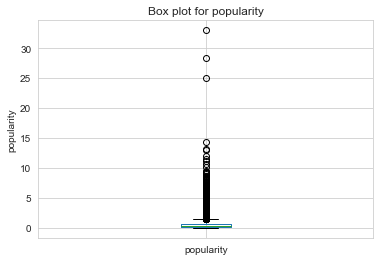

In [172]:
# Exploring univriate features using boxplot
X['popularity'].plot(figsize=(6,4),kind='box')
plt.ylabel('popularity')

plt.title('Box plot for popularity')

Text(0.5, 1.0, 'Box plot for revenue')

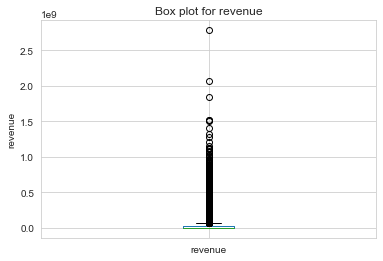

In [173]:
X['revenue'].plot(figsize=(6,4),kind='box')
plt.ylabel('revenue')
plt.title('Box plot for revenue')

Text(0.5, 1.0, 'Box plot for Profit')

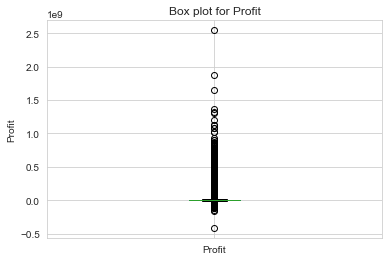

In [174]:
X['Profit'].plot(figsize=(6,4),kind='box')
plt.ylabel('Profit')
plt.title('Box plot for Profit')

### AS we can see from the three boxplots that there are many outliers in each feature, many points are far away with distance 1.5*interquantile + the third quantile 

### popularity is the one with the most extreme outliers in the three plots


(1960.0, 2020.0)

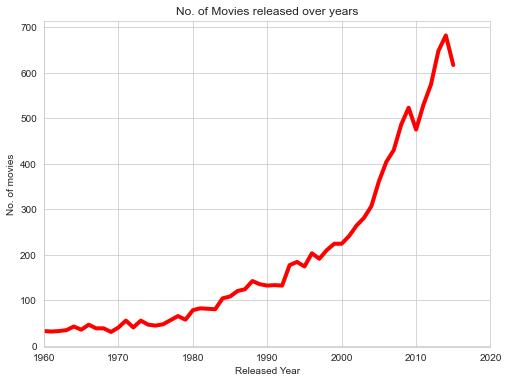

In [121]:
X.groupby('release_year')['imdb_id'].count().plot(figsize=(8,6), linewidth=4,color='r')
plt.title('No. of Movies released over years')
plt.xlabel('Released Year')
plt.ylabel('No. of movies')
plt.xlim(1960,2020)

In [162]:
# Statistical describtion for Release year
X['release_year'].describe()

count    10724.000000
mean      2001.254196
std         12.822467
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

### we can see that number of movies released is increasing over the years with slight fluctuations, with its peak in 2014 and then a downward trend begins after 2014

In [122]:
X.groupby('release_year')['imdb_id'].count().sort_values(ascending=False).head(1)

release_year
2014    682
Name: imdb_id, dtype: int64

# First question conclusion: 
### 2014 was the year that had the highest release of movies with 682 movies

### Research Question 2  (Which Year Has The Highest Profit Rate?)

Text(0.5, 1.0, 'profit per each year')

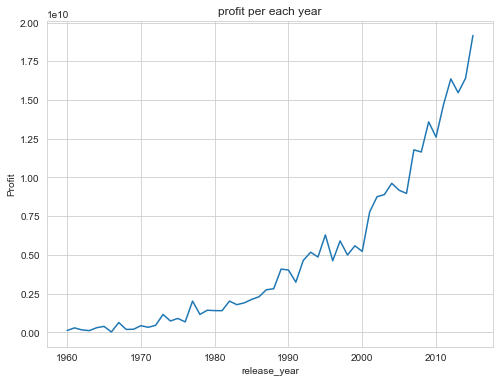

In [123]:
#Groupby the year and calculate the profit rate for each year
X.groupby('release_year')['Profit'].sum().plot(figsize=(8,6))
plt.ylabel('Profit')
plt.title('profit per each year')

In [163]:
# Statistical describtion for Profit
X['Profit'].describe()

count    1.072400e+04
mean     2.553290e+07
std      9.718023e+07
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+07
max      2.544506e+09
Name: Profit, dtype: float64

### An upward trend with aggressive fluctuations between 1990 and 2005 but with a peak in 2015 with an upward trend after 

In [124]:
X.groupby('release_year')['Profit'].sum().sort_values(ascending=False).head()

release_year
2015    19165902961
2014    16405806546
2012    16363444772
2013    15472595156
2011    14677437926
Name: Profit, dtype: int64

# Second question conclusion: 
### 2015 was the year that had the highest Profit Rate with 1.916e10 USD

### Research Question 3  (Which length movies most liked by the audiences according to their popularity?)

Text(0, 0.5, 'Popularity')

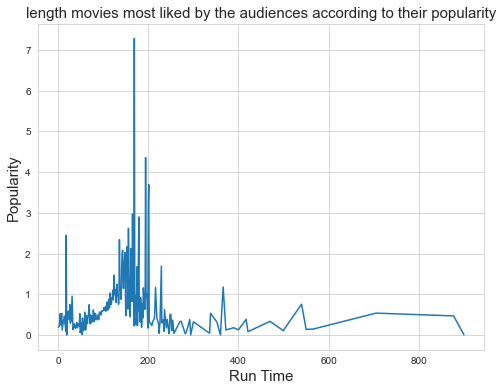

In [178]:
X.groupby('runtime')['popularity'].mean().plot(figsize=(8,6))
plt.title('length movies most liked by the audiences according to their popularity',fontsize=15)
plt.xlabel('Run Time',fontsize=15)
plt.ylabel('Popularity',fontsize=15)

In [165]:
# Statistical describtion for popularity and runtime
X[['runtime','popularity']].describe().T

,count,mean,std,min,25%,50%,75%,max
runtime,10724.0,102.503450,30.460109,0.000000,90.000000,99.000000,112.000000,900.000000
popularity,10724.0,0.652858,1.005072,0.000188,0.210766,0.387247,0.721577,32.985763


### We can see from the plot that populartiy increases with movies that lasts between 100 and 200 mins and increases after the 210 mins 

### also populartiy increases with really short films 

In [126]:
X.groupby('runtime')['popularity'].mean().sort_values(ascending=False).head()

runtime
169    7.279679
194    4.355219
201    3.687482
200    3.264571
165    2.970531
Name: popularity, dtype: float64

## Third question conclusion: 
### movies with runtime around 100~200 mins are the most popular on average

### Research Question 4  (Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?)

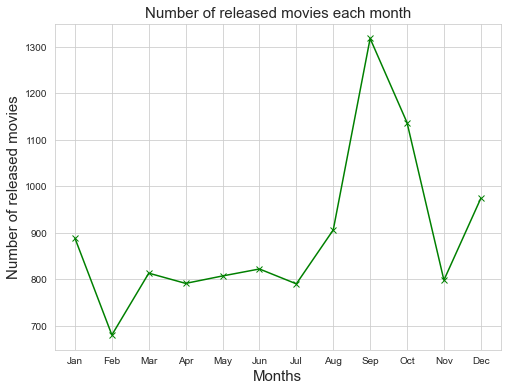

In [179]:
#Create a month column 
X['month']=X['release_date'].dt.month
#calculating the number of released movies
X.groupby('month')['imdb_id'].count().plot(figsize=(8,6),color='g',marker='x')
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of released movies',fontsize=15)
plt.title('Number of released movies each month',fontsize=15)
plt.xticks(ticks=range(1,13),labels=month);


In [169]:
# Statistical describtion for month
X[['month']].describe().T

,count,mean,std,min,25%,50%,75%,max
month,10724.0,6.834577,3.433064,1.0,4.0,7.0,10.0,12.0


### We can see september wins the month with the most released movies with no competitor

### also Feburary wins the month with the least released movies

In [128]:
X['month']=X['release_date'].dt.month
X.groupby('month')['imdb_id'].count().sort_values(ascending=False).head()

month
9     1318
10    1137
12     974
8      906
1      888
Name: imdb_id, dtype: int64

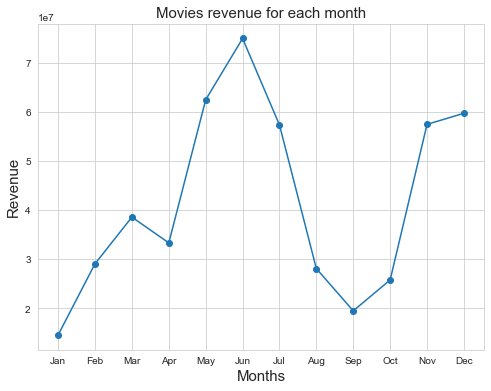

In [180]:
X.groupby('month')['revenue'].mean().plot(figsize=(8,6),marker='o')
plt.xlabel('Months',fontsize=15)
plt.ylabel('Revenue',fontsize=15)
plt.title('Movies revenue for each month',fontsize=15)
plt.xticks(ticks=range(1,13),labels=month);

In [170]:
# Statistical describtion for revenue
X[['revenue']].describe().T

,count,mean,std,min,25%,50%,75%,max
revenue,10724.0,4.034621e+07,1.176863e+08,0.0,0.0,0.0,25009801.25,2.781506e+09


### Here June has the highest Revenue among all months, in contrast September has the least  

In [130]:
X.groupby('month')['revenue'].mean().sort_values(ascending=False).head()

month
6     7.501288e+07
5     6.252152e+07
12    5.976577e+07
11    5.751410e+07
7     5.738965e+07
Name: revenue, dtype: float64

## Fourth question conclusion: 
### September is the Month with Highest Number Of Released Movies In All Of The Years (1318 Movies)
### June is the month with the highest revenue with (7.5e7 USD)

### Research Question 5   (Most Frequent Actor?)

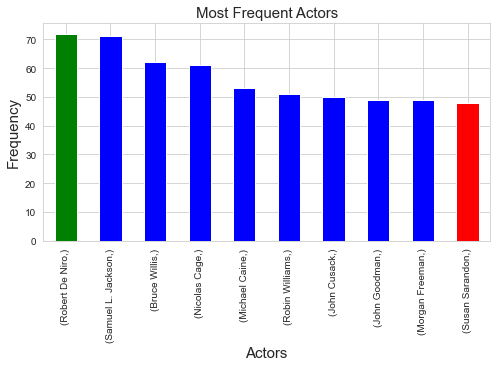

In [187]:
# defining a function that splits the cast column 

def splitting (data,col):
    #concatenate the cast column by a pipeline  
    actor=data[col].str.cat(sep='|')
    #Split the cast column, as it's seperated by | , then creating a dataframe to enclose it.0
    actors=pd.DataFrame(actor.split('|')).value_counts(ascending=False)
    return actors

#calling the function
actors=splitting (X,'cast')
colors=['g','b','b','b','b','b','b','b','b','r']
actors.iloc[:10].plot(kind='bar',color=colors,figsize=(8,4))
plt.xlabel('Actors',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Most Frequent Actors',fontsize=15);



### It's obvious that Robert De Niro is the most actor with the most appearances made in this dataset

### on the other hand Susan Sarandon is the least actor that appeared

In [132]:
actors.iloc[:1]

Robert De Niro    72
dtype: int64

## Fifth question conclusion: 
### Robert De Niro is the most Frequent actor with 72 appearances in the dataset

### Research Question 6   ( What kinds of properties are associated with movies that have high revenues?)

In [133]:
#Creating a new dataset with sorted revenue 
rev=pd.DataFrame(X['revenue'].sort_values(ascending=False))
#defining a list of features that could affect the revenue
features=['vote_average','runtime','popularity','budget','Profit']
for feature in features:
    rev[feature]=X[feature]
rev.head()

,revenue,vote_average,runtime,popularity,budget,Profit
1386,2781505847,7.1,162,9.432768,237000000,2544505847
3,2068178225,7.5,136,11.173104,200000000,1868178225
5231,1845034188,7.3,194,4.355219,200000000,1645034188
4361,1519557910,7.3,143,7.637767,220000000,1299557910
0,1513528810,6.5,124,32.985763,150000000,1363528810


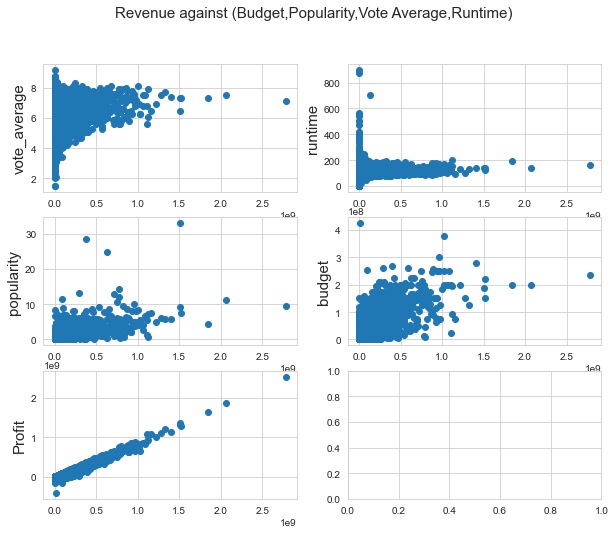

In [189]:
# creating axes to plot different relations between revenue and those features
fig, ax=plt.subplots(3,2,figsize=(10,8))

ax[0,0].scatter(rev['revenue'],rev['vote_average'])
ax[0,1].scatter(rev['revenue'],rev['runtime'])
ax[1,0].scatter(rev['revenue'],rev['popularity'])
ax[1,1].scatter(rev['revenue'],rev['budget'])
ax[2,0].scatter(rev['revenue'],rev['Profit'])

# renaming the axes so that the plots are informative 
ax[0,0].set_ylabel('vote_average',fontsize=15)
ax[0,1].set_ylabel('runtime',fontsize=15)
ax[1,0].set_ylabel('popularity',fontsize=15)
ax[1,1].set_ylabel('budget',fontsize=15)
ax[2,0].set_ylabel('Profit',fontsize=15)

fig.suptitle("Revenue against (Budget,Popularity,Vote Average,Runtime)",fontsize=15);


In [171]:
# Statistical describtion for the above features
X[['Profit','popularity','budget','runtime','vote_average']].describe().T

,Profit,popularity,budget,runtime,vote_average
count,1.072400e+04,10724.000000,1.072400e+04,10724.000000,10724.000000
mean,2.553290e+07,0.652858,1.481331e+07,102.503450,5.964407
std,9.718023e+07,1.005072,3.107239e+07,30.460109,0.930163
min,-4.139124e+08,0.000188,0.000000e+00,0.000000,1.500000
25%,0.000000e+00,0.210766,0.000000e+00,90.000000,5.400000
50%,0.000000e+00,0.387247,0.000000e+00,99.000000,6.000000
75%,1.000000e+07,0.721577,1.600000e+07,112.000000,6.600000
max,2.544506e+09,32.985763,4.250000e+08,900.000000,9.200000


### We can see that Profit,Vote_average and budget are the most  affective features when it comes to revenue 

### Popularity and rutime make good relations but not as strong 

# Conclusions

### We asked 5 questions along our journey with this dataset:

Which year has the highest release of movies?

**we found that 2014 was the year that had the highest release of movies with 682 movies**

 Which Year Has The Highest Profit Rate?
 
**we found that 2015 was the year that had the highest Profit Rate with 1.916e10 USD**

 Which length movies most liked by the audiences according to their popularity?
 
**we found that movies with runtime around 100~200 mins are the most popular on average**
 
 Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?
 
**we found that September is the Month with Highest Number Of Released Movies In All Of The Years (1318 Movies) and 
June is the month with the highest revenue with (7.5e7 USD)**

 Most Frequent Actor?

**we found that Robert De Niro is the most Frequent actor with 72 appearances in the dataset**

What kinds of properties are associated with movies that have high revenues?

**we found that profit and budget are the top two criteria associated with high revenue followed by vote average**

## Limitations:
With all the missing production companies I wasn't able to figure out the most profitable production companies

